In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [4]:
# Define the stock tickers and time period
tickers = ['RELIANCE.NS', 'HDFCBANK.NS', 'TCS.NS']
end_date = datetime.now()
start_date = end_date - timedelta(days=10*365)  # 10 years

In [7]:
# Fetch historical data
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
data.head()

[*********************100%***********************]  3 of 3 completed


Ticker,HDFCBANK.NS,RELIANCE.NS,TCS.NS
Date,,,
2014-10-07 00:00:00+00:00,398.901520,397.952789,1149.266357
2014-10-08 00:00:00+00:00,401.283478,402.485931,1129.006836
2014-10-09 00:00:00+00:00,410.533936,410.198792,1138.621582
2014-10-10 00:00:00+00:00,401.144745,412.776855,1127.028687
2014-10-13 00:00:00+00:00,405.538696,411.595245,1143.038940


In [9]:
returns = data.pct_change().dropna()
returns.head()

Ticker,HDFCBANK.NS,RELIANCE.NS,TCS.NS
Date,,,
2014-10-08 00:00:00+00:00,0.005971,0.011391,-0.017628
2014-10-09 00:00:00+00:00,0.023052,0.019163,0.008516
2014-10-10 00:00:00+00:00,-0.022871,0.006285,-0.010182
2014-10-13 00:00:00+00:00,0.010954,-0.002863,0.014206
2014-10-14 00:00:00+00:00,-0.009637,0.003497,-0.006386


<Figure size 1400x700 with 0 Axes>

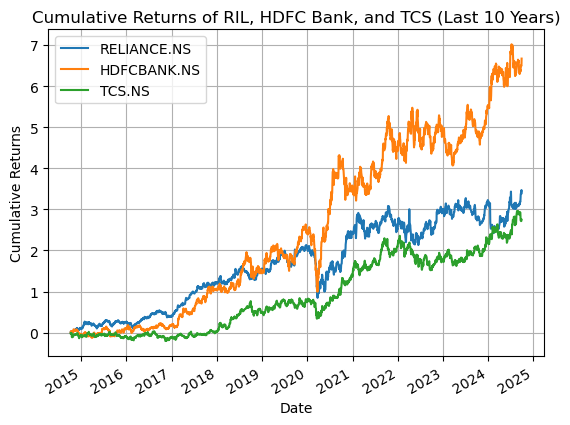

In [21]:
cumulative_returns = (1 + returns).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(14, 7))
cumulative_returns.plot()
plt.title('Cumulative Returns of RIL, HDFC Bank, and TCS (Last 10 Years)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(tickers)
plt.grid()
plt.show()